# Bulldozers pricing machine learning.

## 1.Problem Definition:-
* The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.  The data is sourced from auction result postings and includes information on usage and equipment configurations

## 2.Data:-
* https://www.kaggle.com/c/bluebook-for-bulldozers/data
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3.Evaluation:-
* The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4.Features:-
* Kaggle provide data dictionary https://www.kaggle.com/c/bluebook-for-bulldozers/data.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Importing training and validation dataset
df=pd.read_csv("zero-to-mastery-ml-master/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)

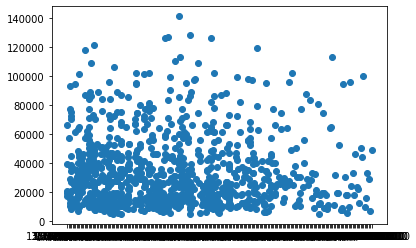

In [77]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

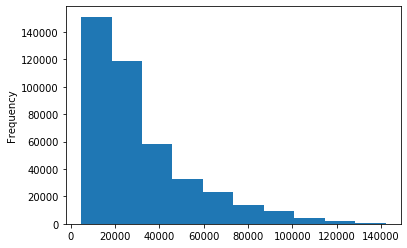

In [14]:
df.SalePrice.plot.hist();

# Parsing Dates
when we work with the time series data,we want to enrich the time and date component as much possible.

We can do that by telling pandas which of our columns has dates in it using the *parse_dates* parameter.


In [3]:
# Import data again but this time with time parse datas
df=pd.read_csv("zero-to-mastery-ml-master/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [4]:
df.saledate.dtype

dtype('<M8[ns]')

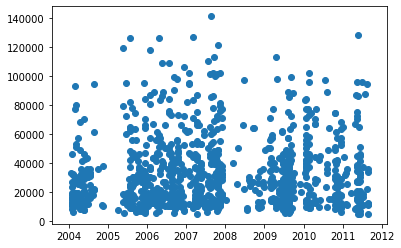

In [5]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

### Sort DataFrame by saledate

When working with time series data,it's good idea to sort it by date.

In [6]:
# Sort Dataframe in date order
df.sort_values(by=("saledate"),ascending=True,inplace=True)

In [7]:
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of original DataFrame
Make a copy of data so when we manipulate the copy,we still have got our original data.

In [8]:
# Make a copy
df_temp=df.copy()

In [9]:
df_temp.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Add datetime parameter for SaleDate column

In [10]:
df_temp["SaleYear"]=df_temp.saledate.dt.year
df_temp["SaleMonth"]=df_temp.saledate.dt.month
df_temp["SaleDay"]=df_temp.saledate.dt.day
df_temp["SaleDayofweek"]=df_temp.saledate.dt.dayofweek
df_temp["SaleDayofyear"]=df_temp.saledate.dt.dayofyear

In [11]:
# After enriching dataset we can remove saledate
df_temp.drop("saledate",axis=1,inplace=True)

# 5. Modelling
We have done enough EDA,Let's start to do some model-driver EDA.

In [12]:
# Let's build machine learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,
                           random_state=12)
model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

ValueError: could not convert string to float: 'Low'

## Converting datatypes into numbers
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.api.types.is_string_dtype.html

In [13]:
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [80]:
# Change all object or string columns into categories
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()

In [15]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [16]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [17]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [18]:
# Check missing data
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Save preprocessed data

In [78]:
# Export current temp dataframe
df_temp.to_csv("zero-to-mastery-ml-master/bluebook-for-bulldozers/train_temp.csv",
              index=False)

In [79]:
# Import preprocessed data
df_temp=pd.read_csv("zero-to-mastery-ml-master/bluebook-for-bulldozers/train_temp.csv",
                   low_memory=False)

## Fill missing values

### Fill numeric values


In [81]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
SaleYear
SaleMonth
SaleDay
SaleDayofweek
SaleDayofyear
auctioneerID_is_missing
MachineHoursCurrentMeter_is_missing
UsageBand_is_missing
fiSecondaryDesc_is_missing
fiModelSeries_is_missing
fiModelDescriptor_is_missing
ProductSize_is_missing
Drive_System_is_missing
Enclosure_is_missing
Forks_is_missing
Pad_Type_is_missing
Ride_Control_is_missing
Stick_is_missing
Transmission_is_missing
Turbocharged_is_missing
Blad

In [82]:
# Check which numeric column have null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [21]:
# Fill missing values with the median
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add binary column which tells us if the column was missing
            df_temp[label+"_is_missing"]=pd.isnull(content)
            # Fill missing numeric valus with the median
            df_temp[label]=content.fillna(content.median())

In [22]:
# Check if there is any missing column
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [23]:
# Check how many values were missing
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [49]:
# Turn categorical variable with numbers and fill missing data
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [33]:
pd.Categorical(df_temp["fiModelDesc"]).codes

array([4592, 1819, 2347, ...,  626,   82,  988], dtype=int16)

In [48]:
# Turn categorical variable with numbers and fill missing data
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add binary columns
            df_temp[label+"_is_missing"]=pd.isnull(content)
            #Fill missing values
            df_temp[label]=pd.Categorical(content).codes +1

In [50]:
# Check if any missing values
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 91, dtype: int64

Now that all values are converted into numeric values and their is no missing data,we can start building machine learning model.

In [51]:
%%time
# Instantiate model
model=RandomForestRegressor(n_jobs=-1,
                           random_state=12)
# Fit the model
model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

Wall time: 13min 21s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=12, verbose=0, warm_start=False)

In [47]:
df_temp.drop("state",axis=1,inplace=True)

In [52]:
#Score the model
model.score(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

0.9864949005000145

### Splitting data in train/validation sets

In [57]:
df_temp.SaleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: SaleYear, dtype: int64

In [58]:
# Splitting data into training and validation
df_val=df_temp[df_temp.SaleYear==2012]
df_train=df_temp[df_temp.SaleYear!=2012]

len(df_val),len(df_train)

(11573, 401125)

In [59]:
# Split data into x and y
x_train,y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
x_val,y_val=df_val.drop("SalePrice",axis=1),df_val.SalePrice

x_train.shape,y_train.shape,x_val.shape,y_val.shape

((401125, 90), (401125,), (11573, 90), (11573,))

### Building an evaluation function

In [65]:
# Create an evaluation function (The competition used RMSLE)
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    """
    Calculates Root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create a function to evaluate model on different levels

def show_scores(model):
    train_preds=model.predict(x_train)
    val_preds=model.predict(x_val)
    scores={"Training MAE":mean_absolute_error(y_train,train_preds),
           "Valid MAE":mean_absolute_error(y_val,val_preds),
           "Training RMSLE":rmsle(y_train,train_preds),
           "Valid RMSLE":rmsle(y_val,val_preds),
           "Training R^2":r2_score(y_train,train_preds),
           "Valid R^2":r2_score(y_val,val_preds)}
    return scores

### Testing our model on a subset (to tune the hyperparameters)

In [66]:
# Cutting down on the max number of samples each esstimator can see improves time value
model=RandomForestRegressor(n_jobs=-1,
                           random_state=12,
                           max_samples=10000)

In [67]:
%%time
model.fit(x_train,y_train)

Wall time: 1min 19s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=12, verbose=0, warm_start=False)

In [68]:
show_scores(model)

{'Training MAE': 5774.11688244313,
 'Valid MAE': 7568.988208761773,
 'Training RMSLE': 0.26711544398064097,
 'Valid RMSLE': 0.312653156725972,
 'Training R^2': 0.8515415282374847,
 'Valid R^2': 0.8191589651645896}

### Using RandomizedSearchCV for hyperparameter tuning

In [70]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rs_grid={"n_estimators":np.arange(10,100,10),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(2,20,2),
        "max_features":[0.5,1,"sqrt","auto"],
        "max_samples":[10000]}

# Instantiate RandomizedSearchCV model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                 random_state=12),
                           param_distributions=rs_grid,
                           n_iter=2,
                           cv=5,
                           verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.3min finished


Wall time: 2min 26s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [71]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 14,
 'min_samples_leaf': 10,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [72]:
# Evaluate the RandomizedSearchCV model
show_scores(rs_model)

{'Training MAE': 11485.137433335873,
 'Valid MAE': 13975.596854415826,
 'Training RMSLE': 0.4998757430102171,
 'Valid RMSLE': 0.5345874009879718,
 'Training R^2': 0.5087378907764971,
 'Valid R^2': 0.4636455415385895}

## Train a model with the best hyperparameters
Note:- These were found after 100 iterations of RandomizedSearchCV

In [75]:
%%time

# Most Ideal Hyperparameters
ideal_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 n_jobs=-1,
                                 max_samples=None)

# Fit the ideal model
ideal_model.fit(x_train,y_train)

Wall time: 10min 49s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [77]:
# Scores on Ideal model
show_scores(ideal_model)

{'Training MAE': 2995.8026742926977,
 'Valid MAE': 6458.604325764909,
 'Training RMSLE': 0.14820469846679352,
 'Valid RMSLE': 0.27275607880856134,
 'Training R^2': 0.9571354826348369,
 'Valid R^2': 0.8614591612188636}

## Make prediction on test data

In [101]:
# Import the test data
df_test=pd.read_csv("zero-to-mastery-ml-master/bluebook-for-bulldozers/Test.csv",low_memory=False,parse_dates=["saledate"])

In [102]:
# Make prediction on test dataset
test_preds=ideal_model.predict(df_test)

ValueError: could not convert string to float: 'Low'

## Preprocessing the data(getting the test dataset in the same format as our training dataset)

In [103]:
def preprocess_data(df):
    """
    Performs trasnformation on data set.
    """
    df["SaleYear"]=df.saledate.dt.year
    df["SaleMonth"]=df.saledate.dt.month
    df["SaleDay"]=df.saledate.dt.day
    df["SaleDayofweek"]=df.saledate.dt.dayofweek
    df["SaleDayofyear"]=df.saledate.dt.dayofyear
    df.drop("saledate",axis=1,inplace=True)
    
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add binary column which tells us if the column was missing
                df[label+"_is_missing"]=pd.isnull(content)
                # Fill missing numeric valus with the median
                df[label]=content.fillna(content.median())
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"]=pd.isnull(content)
            df[label]=pd.Categorical(content).codes+1
        
    return df

In [104]:
df_test=preprocess_data(df_test)
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [105]:
# We can find the columns differ using sets
set(x_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [106]:
# Manually adjust df_test to have 'auctioneerID_is_missing' column
df_test['auctioneerID_is_missing']=False
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,True,True,True,True,True,False
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,True,True,True,True,True,False
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False


In [124]:
set(df_test.columns)-set(x_train.columns)

set()

In [123]:
df_test.drop("fiModelDesc_is_missing",axis=1,inplace=True)

Now our test dataframe has same features as our training dataframe,we can make predictions.

In [125]:
test_preds=ideal_model.predict(df_test)

In [126]:
# Format predictions into the same format as kaggle is after
df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalesPrice"]=test_preds

In [127]:
df_preds

,SalesID,SalesPrice
0,1227829,20884.066667
1,1227844,28668.518696
2,1227847,48021.957744
3,1227848,91396.315785
4,1227863,40466.421058
...,...,...
12452,6643171,55213.166508
12453,6643173,14354.079593
12454,6643184,12959.942429
12455,6643186,25180.647969


In [128]:
# Export prediction data
df_preds.to_csv("zero-to-mastery-ml-master/bluebook-for-bulldozers/test_predictions.csv",
              index=False)

### Feature importance
Feature importance seeks most important attributes when it comes to predicting the data.

In [129]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([5.57807566e-02, 1.44338701e-02, 5.50584995e-02, 2.98972456e-04,
       3.89458328e-03, 2.74915584e-01, 3.03471236e-03, 9.02093478e-04,
       6.83959717e-02, 5.25590987e-03, 4.38591125e-03, 2.38598892e-01,
       1.55443759e-03, 1.38676136e-02, 4.90043830e-04, 1.49559227e-04,
       1.23766271e-03, 4.09143027e-04, 1.79719737e-03, 1.27513185e-04,
       5.89078558e-03, 4.35752954e-02, 4.07126631e-03, 3.86859087e-03,
       8.13790791e-03, 2.05067546e-03, 3.17031737e-03, 2.85298340e-03,
       6.30710675e-03, 7.45723820e-03, 1.04486614e-03, 1.62547160e-02,
       1.35160752e-05, 2.79650196e-06, 1.86969600e-04, 9.59173928e-04,
       1.33178836e-03, 7.77655435e-04, 2.21999794e-04, 4.09555318e-04,
       3.29777009e-04, 1.77870820e-03, 1.12430487e-03, 2.72172331e-04,
       2.83233841e-04, 7.64319537e-02, 2.04797066e-03, 7.12948906e-03,
       3.42263245e-03, 1.35596938e-02, 2.56439761e-04, 4.54201680e-04,
       1.39963754e-04, 9.11908146e-04, 8.34182445e-04, 1.06692907e-03,
      

In [133]:
# Helper function for plotting feature importance
def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({"Features":columns,
                    "Feature_importances":importances,})
       .sort_values("Feature_importances",ascending=False).reset_index(drop=True))
    
    # Plot the dataframe
    fig,ax=plt.subplots()
    ax.barh(df["Features"][:n],df["Feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

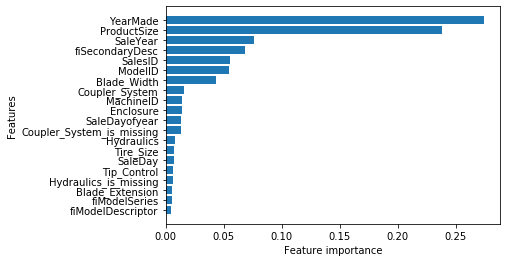

In [134]:
plot_features(x_train.columns,ideal_model.feature_importances_)